In [11]:
import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data description

In [6]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


# Data cleaning 

In [8]:
# Handling missing values
df.dropna(inplace=True)

In [9]:
# Handling outliers (you might want to customize this based on your data)
# For example, removing rows where 'median_house_value' is an outlier
q1 = df['median_house_value'].quantile(0.25)
q3 = df['median_house_value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['median_house_value'] >= lower_bound) & (df['median_house_value'] <= upper_bound)]

In [10]:
# Display updated information about the cleaned dataset
print("Cleaned dataset info:")
print(df.info())

Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19369 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19369 non-null  float64
 1   latitude            19369 non-null  float64
 2   housing_median_age  19369 non-null  float64
 3   total_rooms         19369 non-null  float64
 4   total_bedrooms      19369 non-null  float64
 5   population          19369 non-null  float64
 6   households          19369 non-null  float64
 7   median_income       19369 non-null  float64
 8   median_house_value  19369 non-null  float64
 9   ocean_proximity     19369 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


# Data Exploration

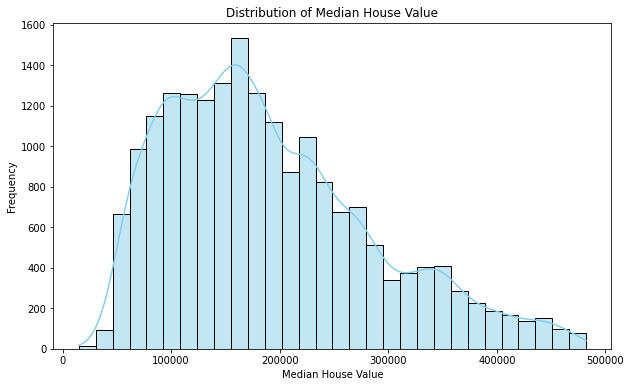

In [12]:
# Histogram of Median House Value
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

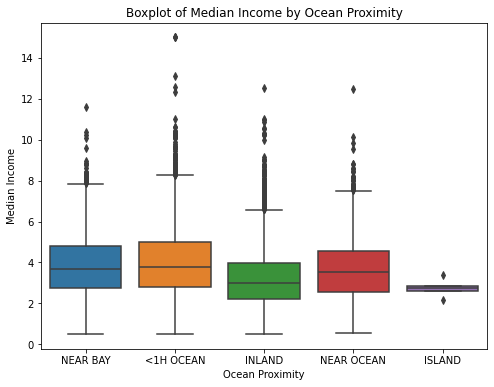

In [13]:
# Boxplot of Median Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='ocean_proximity', y='median_income', data=df)
plt.title('Boxplot of Median Income by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median Income')
plt.show()

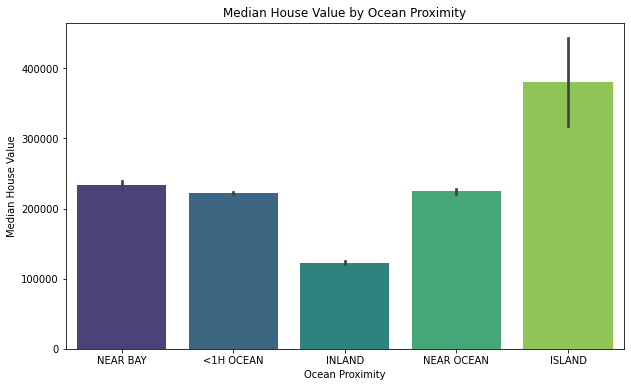

In [15]:
# Bar plot of median house value based on ocean proximity
plt.figure(figsize=(10, 6))
sns.barplot(x='ocean_proximity', y='median_house_value', data=df, palette='viridis')
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

C:\Users\Prayag Purani\AppData\Local\Temp\ipykernel_1956\4032345563.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


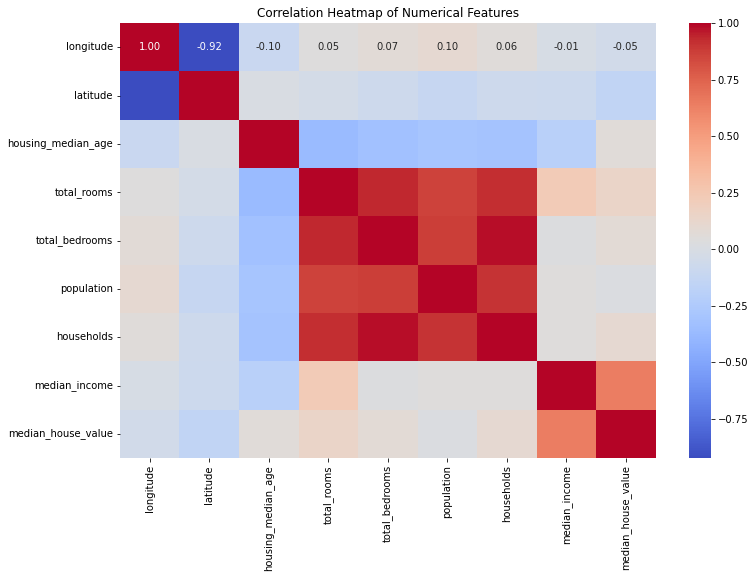

In [16]:
# Heatmap to visualize correlation between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

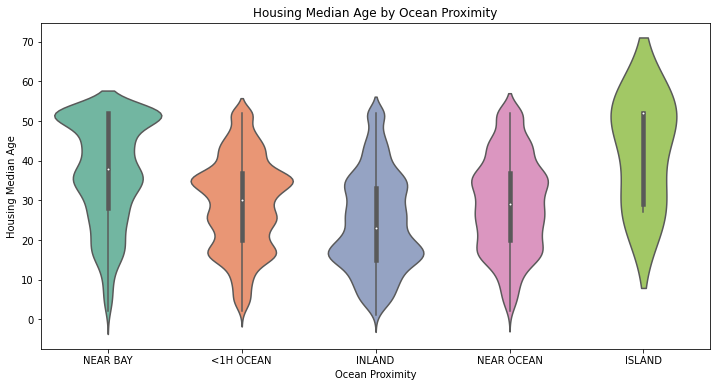

In [17]:
# Violin plot of housing median age by ocean proximity
plt.figure(figsize=(12, 6))
sns.violinplot(x='ocean_proximity', y='housing_median_age', data=df, palette='Set2')
plt.title('Housing Median Age by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Housing Median Age')
plt.show()

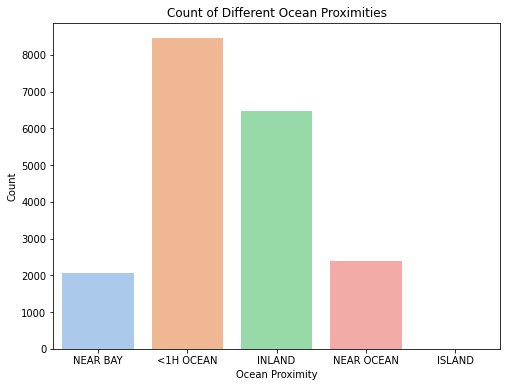

In [18]:
# Count plot of different ocean proximities
plt.figure(figsize=(8, 6))
sns.countplot(x='ocean_proximity', data=df, palette='pastel')
plt.title('Count of Different Ocean Proximities')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()